In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
path = r"C:\Users\ASUS\Downloads\Data & Code ML\Data & Code ML\Data and Programs DTree\BreastCancer.csv"
path

'C:\\Users\\ASUS\\Downloads\\Data & Code ML\\Data & Code ML\\Data and Programs DTree\\BreastCancer.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [5]:
df.head(10)

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
5,142932,7,6,10,5,3,10,9,10,2,Malignant
6,144888,8,10,10,8,5,10,7,8,1,Malignant
7,145447,8,4,4,1,2,9,3,3,1,Malignant
8,160296,5,8,8,10,5,10,8,10,3,Malignant
9,167528,4,1,1,1,2,1,3,6,1,Benign


In [6]:
 dum_df = pd.get_dummies(df,drop_first=True)
dum_df.head(10)

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,False
1,63375,9,1,2,6,4,10,7,7,2,True
2,76389,10,4,7,2,2,8,6,1,1,True
3,95719,6,10,10,10,8,10,7,10,7,True
4,128059,1,1,1,1,2,5,5,1,1,False
5,142932,7,6,10,5,3,10,9,10,2,True
6,144888,8,10,10,8,5,10,7,8,1,True
7,145447,8,4,4,1,2,9,3,3,1,True
8,160296,5,8,8,10,5,10,8,10,3,True
9,167528,4,1,1,1,2,1,3,6,1,False


In [7]:
x = dum_df.iloc[:, 1:10]
y = dum_df.iloc[:, 10]

In [8]:
x.shape, y.shape

((699, 9), (699,))

In [9]:
x

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses
0,5,4,3,1,2,2,2,3,1
1,9,1,2,6,4,10,7,7,2
2,10,4,7,2,2,8,6,1,1
3,6,10,10,10,8,10,7,10,7
4,1,1,1,1,2,5,5,1,1
...,...,...,...,...,...,...,...,...,...
694,10,10,10,10,5,10,10,10,7
695,5,10,10,10,4,10,5,6,3
696,5,1,1,1,2,1,3,2,1
697,4,1,1,1,1,1,2,1,1


In [10]:
y

0      False
1       True
2       True
3       True
4      False
       ...  
694     True
695     True
696    False
697    False
698    False
Name: Class_Malignant, Length: 699, dtype: bool

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=2021, stratify=y
)

In [12]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((489, 9), (210, 9), (210,), (489,))

In [13]:
clf = LogisticRegression(random_state=2021)
clf.fit(x_train, y_train)

LogisticRegression(random_state=2021)

In [14]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[135   3]
 [  5  67]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       138
        True       0.96      0.93      0.94        72

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210

0.9619047619047619


In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

In [16]:
y_pred_prob = clf.predict_proba(x_test)[:, 1]  # compute predicted probabilities
y_pred_prob

array([9.94607057e-01, 1.39274532e-02, 6.25996885e-01, 9.31661938e-01,
       9.99963739e-01, 9.94106353e-01, 9.85578759e-01, 3.72134520e-03,
       9.94798317e-01, 9.92569949e-01, 8.94063637e-04, 2.72734662e-03,
       7.00974138e-03, 8.96701700e-03, 9.99685177e-01, 6.48749798e-03,
       6.85122166e-02, 2.93155598e-03, 1.34235604e-01, 7.64320195e-01,
       9.93656877e-01, 3.16055863e-03, 1.23823961e-02, 3.47290699e-01,
       7.76989906e-03, 4.20807781e-03, 1.19555130e-02, 9.78815528e-01,
       8.83976005e-03, 3.63832330e-03, 1.56145018e-02, 3.29072508e-03,
       4.32783589e-03, 6.43307503e-01, 8.83976005e-03, 1.80388044e-01,
       3.10625684e-02, 1.56193440e-03, 2.45478009e-03, 8.94063637e-04,
       9.99818149e-01, 1.67903074e-03, 2.91906339e-03, 9.99996994e-01,
       3.63173481e-02, 8.49196856e-03, 1.23304373e-02, 8.16848852e-01,
       5.09467714e-03, 2.67924039e-03, 4.01507941e-02, 1.20790995e-02,
       7.40930259e-01, 9.99827152e-01, 1.07740145e-02, 9.99630129e-01,
      

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

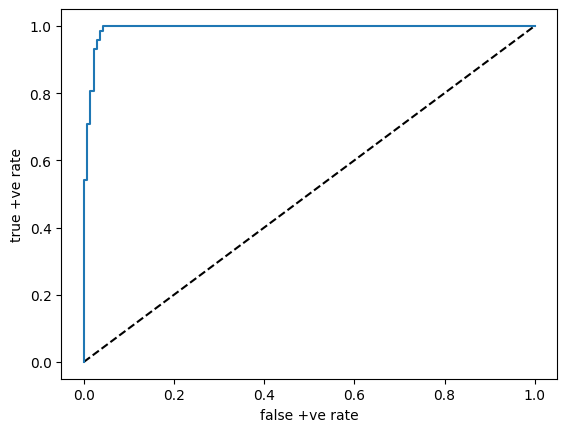

np.float64(0.9922504025764896)

In [18]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("false +ve rate")
plt.ylabel("true +ve rate")
plt.show()
roc_auc_score(y_test, y_pred_prob)

# everything same till train_test_split

In [19]:
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [20]:
clf.feature_importances_

array([0.03232117, 0.03225037, 0.75901809, 0.02066388, 0.02624805,
       0.09580797, 0.00878008, 0.02491039, 0.        ])

In [21]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[134   4]
 [  7  65]]
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       138
        True       0.94      0.90      0.92        72

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210

0.9476190476190476


In [22]:
y_pred_prob = clf.predict_proba(x_test)[:, 1]  # compute predicted probabilities
y_pred_prob

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0.])

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

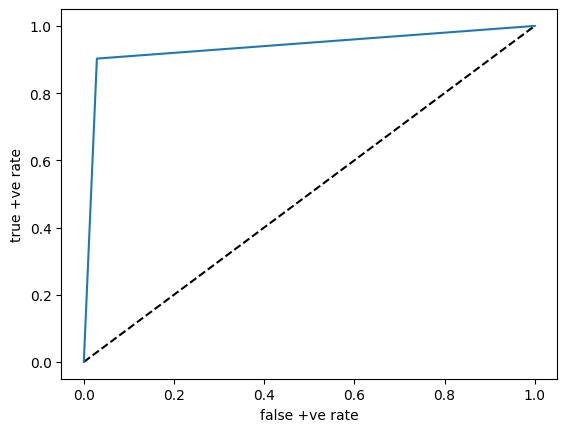

np.float64(0.9368961352657004)

In [24]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("false +ve rate")
plt.ylabel("true +ve rate")
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [25]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
